<a href="https://colab.research.google.com/github/shreyjain26/CodeKraken_TechTitans_4/blob/main/Soil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
import torch
from torch import nn
import torchvision
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from tqdm.auto import tqdm

In [2]:
!git clone https://github.com/shreyjain26/Soil_classification

fatal: destination path 'Soil_classification' already exists and is not an empty directory.


In [3]:
# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [72]:
IMAGE_SHAPE  = (256, 256)

In [73]:
transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize(IMAGE_SHAPE),
    torchvision.transforms.RandomHorizontalFlip(0.75),
    torchvision.transforms.RandomRotation(degrees=15),
    torchvision.transforms.ToTensor(),
])

In [74]:
dataset = torchvision.datasets.ImageFolder('Soil_classification/data', transform=transform)

In [75]:
dataset

Dataset ImageFolder
    Number of datapoints: 84
    Root location: Soil_classification/data
    StandardTransform
Transform: Compose(
               Resize(size=(256, 256), interpolation=bilinear, max_size=None, antialias=warn)
               RandomHorizontalFlip(p=0.75)
               RandomRotation(degrees=[-15.0, 15.0], interpolation=nearest, expand=False, fill=0)
               ToTensor()
           )

In [76]:
dataset.class_to_idx

{'alluvial': 0,
 'arid': 1,
 'black_cotton': 2,
 'laterite': 3,
 'mountain': 4,
 'red': 5}

In [77]:
dataset.classes

['alluvial', 'arid', 'black_cotton', 'laterite', 'mountain', 'red']

In [78]:
categories = dataset.classes

In [79]:
len(dataset)

84

In [80]:
img, label = dataset[0][0], dataset[0][1]
print(f"Image tensor:\n{img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor:
tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])
Image shape: torch.Size([3, 256, 256])
Image datatype: torch.float32
Image label: 0
Label datatype: <class 'int'>


Original shape: torch.Size([3, 256, 256]) -> [color_channels, height, width]
Image permute shape: torch.Size([256, 256, 3]) -> [height, width, color_channels]


(-0.5, 255.5, 255.5, -0.5)

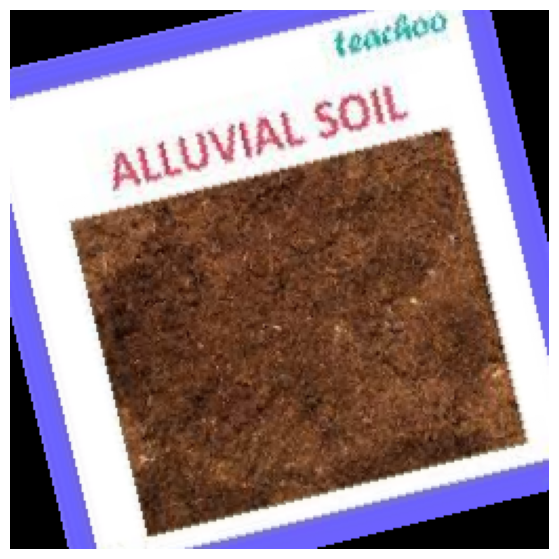

In [81]:
# Rearrange the order of dimensions
img_permute = img.permute(1, 2, 0)

# Print out different shapes (before and after permute)
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute shape: {img_permute.shape} -> [height, width, color_channels]")

# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img.permute(1, 2, 0))
plt.axis("off")

In [82]:
def visualize_img(dataset, img_index):
  img, label = dataset[img_index][0], dataset[img_index][1]
  print(f"Image tensor:\n{img}")
  print(f"Image shape: {img.shape}")
  print(f"Image datatype: {img.dtype}")
  print(f"Image label: {label}")
  print(f"Label datatype: {type(label)}")

  img_permute = img.permute(1, 2, 0)

  print(f"Original shape: {img.shape} -> [color_channels, height, width]")
  print(f"Image permute shape: {img_permute.shape} -> [height, width, color_channels]")

  plt.figure(figsize=(10, 7))
  plt.imshow(img.permute(1, 2, 0))
  plt.axis("off")

Image tensor:
tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])
Image shape: torch.Size([3, 256, 256])
Image datatype: torch.float32
Image label: 2
Label datatype: <class 'int'>
Original shape: torch.Size([3, 256, 256]) -> [color_channels, height, width]
Image per

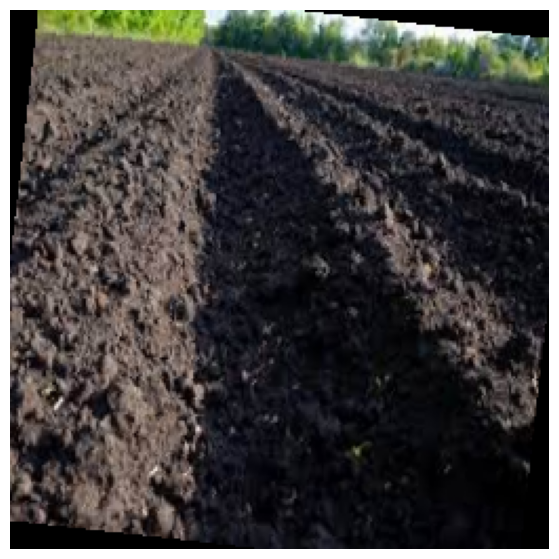

In [83]:
visualize_img(dataset, 32)

Image tensor:
tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])
Image shape: torch.Size([3, 256, 256])
Image datatype: torch.float32
Image label: 5
Label datatype: <class 'int'>
Original shape: torch.Size([3, 256, 256]) -> [color_channels, height, width]
Image per

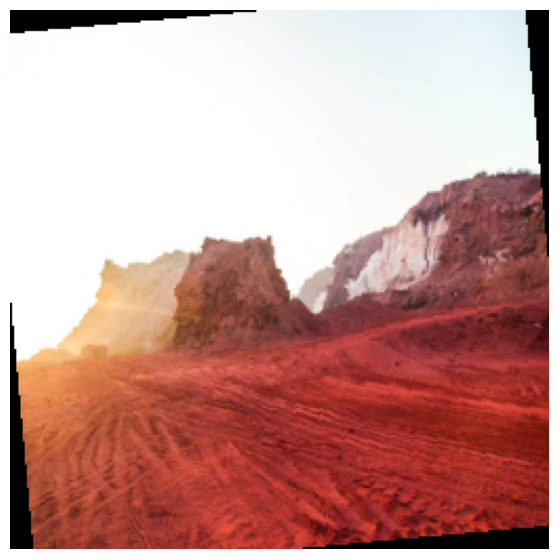

In [84]:
visualize_img(dataset, 80)

In [85]:
dataloader = torch.utils.data.DataLoader(dataset=dataset, num_workers=2, shuffle=True, batch_size=7)

In [86]:
dataloader

In [110]:
img, label = next(iter(dataloader))

print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([16, 3, 256, 256]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([16])


In [111]:
class Classifier(nn.Module):
  def __init__(self, input_shape, hidden_units, output_shape):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
    )

    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2),
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        # print(in_features)
        nn.Linear(in_features=hidden_units*64*64,
                  out_features=output_shape),
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    x = self.conv_block_2(x)
    x = self.classifier(x)
    return x

In [112]:
model_0 = Classifier(
    input_shape=3,
    hidden_units=10,
    output_shape=len(dataset.classes)).to(device)

model_0

Classifier(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=40960, out_features=6, bias=True)
  )
)

In [113]:
try:
    import torchinfo
except:
    !pip install torchinfo
    import torchinfo

from torchinfo import summary
summary(model_0, input_size=[1, 3, 256, 256])

Layer (type:depth-idx)                   Output Shape              Param #
Classifier                               [1, 6]                    --
├─Sequential: 1-1                        [1, 10, 128, 128]         --
│    └─Conv2d: 2-1                       [1, 10, 256, 256]         280
│    └─ReLU: 2-2                         [1, 10, 256, 256]         --
│    └─Conv2d: 2-3                       [1, 10, 256, 256]         910
│    └─ReLU: 2-4                         [1, 10, 256, 256]         --
│    └─MaxPool2d: 2-5                    [1, 10, 128, 128]         --
├─Sequential: 1-2                        [1, 10, 64, 64]           --
│    └─Conv2d: 2-6                       [1, 10, 128, 128]         910
│    └─ReLU: 2-7                         [1, 10, 128, 128]         --
│    └─Conv2d: 2-8                       [1, 10, 128, 128]         910
│    └─ReLU: 2-9                         [1, 10, 128, 128]         --
│    └─MaxPool2d: 2-10                   [1, 10, 64, 64]           --
├─Sequentia

In [114]:
def train(model,
          dataloader,
          loss_fn,
          optimizer):

  model.train()

  train_loss, train_acc = 0, 0

  for batch, (x, y) in enumerate(dataloader):
    x, y = x.to(device), y.to(device)
    y_prediction = model(x)
    loss = loss_fn(y_prediction, y)
    train_loss += loss.item()
    optimizer.zero_grad()
    loss.backward()

    y_pred_class = torch.argmax(torch.softmax(y_prediction, dim=1), dim=1)
    train_acc += (y_pred_class == y).sum().item()/len(y_prediction)

  train_loss = train_loss / len(dataloader)
  train_acc = train_acc / len(dataloader)
  return train_loss, train_acc

In [115]:
NO_EPOCHS = 100
LR = 0.001
WEIGHT_DECAY = 1e-5
LR_STEP_SIZE = 30
LR_GAMMA = 0.5

optimizer = torch.optim.Adam(model_0.parameters(), lr=LR, weight_decay=WEIGHT_DECAY)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=LR_STEP_SIZE, gamma=LR_GAMMA)

In [116]:
for epoch in tqdm(range(NO_EPOCHS)):

  train_loss, train_acc = train(model=model_0,
                                dataloader=dataloader,
                                loss_fn=nn.CrossEntropyLoss(),
                                optimizer=optimizer)
  if (epoch+1) % 5 == 0:
    print(f"Train Loss: {train_loss}, Train Accuracy: {train_acc}")

  0%|          | 0/100 [00:00<?, ?it/s]

Train Loss: 1.7916048392653465, Train Accuracy: 0.1796875
Train Loss: 1.7916250377893448, Train Accuracy: 0.1796875
Train Loss: 1.7912963330745697, Train Accuracy: 0.18229166666666666
Train Loss: 1.7918008863925934, Train Accuracy: 0.17838541666666666
Train Loss: 1.791761428117752, Train Accuracy: 0.1796875
Train Loss: 1.7921662852168083, Train Accuracy: 0.17838541666666666
Train Loss: 1.7922779321670532, Train Accuracy: 0.17708333333333334
Train Loss: 1.792036548256874, Train Accuracy: 0.17578125
Train Loss: 1.7918277829885483, Train Accuracy: 0.17838541666666666
Train Loss: 1.7912468165159225, Train Accuracy: 0.18229166666666666
Train Loss: 1.7918812930583954, Train Accuracy: 0.1796875
Train Loss: 1.791707806289196, Train Accuracy: 0.17708333333333334
Train Loss: 1.7918240129947662, Train Accuracy: 0.1796875
Train Loss: 1.7916625440120697, Train Accuracy: 0.1796875
Train Loss: 1.7915794104337692, Train Accuracy: 0.1796875
Train Loss: 1.7917702794075012, Train Accuracy: 0.1796875
Trai

In [66]:
import urllib.request
from io import BytesIO

torch.Size([3, 128, 128])


'black_cotton'

In [67]:
def predict(url, model, classes):
  file = urllib.request.urlopen(url)
  data = file.read()
  img = Image.open(BytesIO(data))
  plt.imshow(img)
  plt.show()
  img = transform(img)
  prediction = model(torch.unsqueeze(img, dim=0).to(device))
  prediction = torch.argmax(torch.softmax(prediction, dim=1), dim=1)
  return classes[prediction]

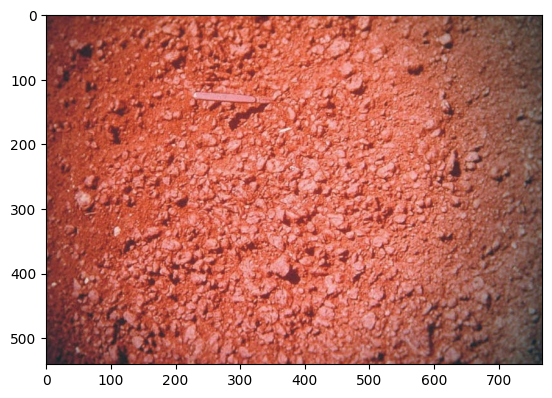

'mountain'

In [96]:
url = 'http://2.bp.blogspot.com/-UGqLaVdcqHc/UsZ914xiSPI/AAAAAAAAA94/S9JBNJCN_9s/s1600/Laterite+Soil.jpg'
predict(url, model_0, categories)

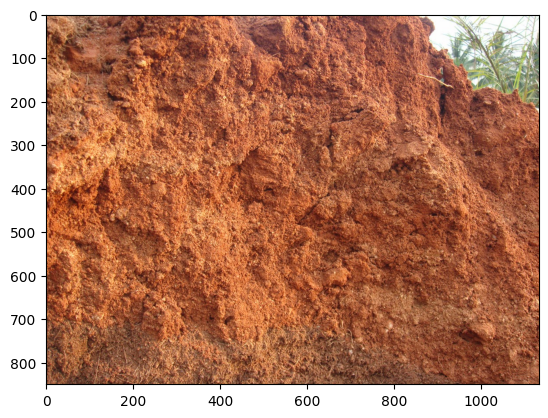

'black_cotton'

In [69]:
url = 'http://3.bp.blogspot.com/-_Nn1s8QzSOQ/UsZ4sQY7OmI/AAAAAAAAA9A/jT5OscQvLHM/s1600/Red+Soil.jpg'
predict(url, model_0, categories)

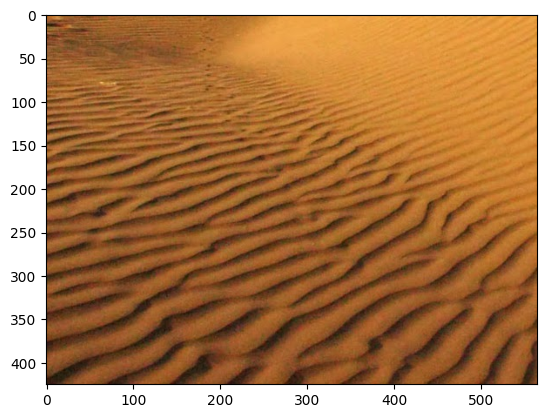

'mountain'

In [99]:
url = 'http://1.bp.blogspot.com/-uMqRJ9AbRYs/UsZ7y5hGohI/AAAAAAAAA9s/NM2jJDQ2cXw/s1600/Desert+Soil.jpg'
predict(url, model_0, categories)

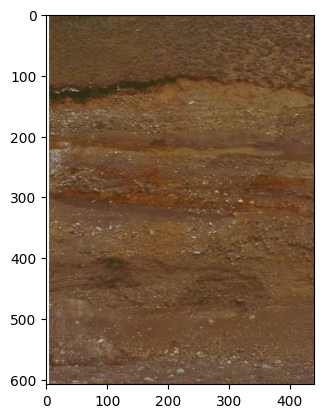

'mountain'

In [98]:
url = 'http://3.bp.blogspot.com/-18Ejie8GIVs/UsZ2n81OplI/AAAAAAAAA8w/8BSUW0-Fwx4/s1600/alluvial+soil.jpg'
predict(url, model_0, categories)

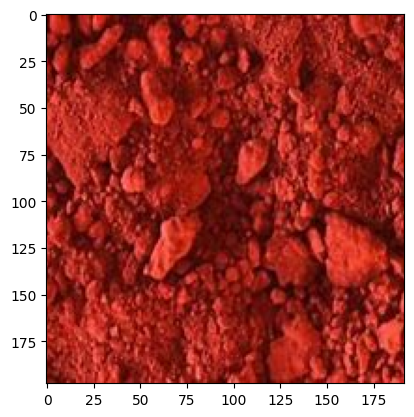

'mountain'

In [97]:
url = 'https://th.bing.com/th/id/OIP.vS_bmHJeI9G8wxukhfcUZgHaHa?w=175&h=180&c=7&r=0&o=5&dpr=1.1&pid=1.7'
predict(url, model_0, categories)